# 統計グラフ＋
seaborn ライブラリーの活用

## 可視化関連ライブラリの読み込み

In [1]:
# matplotlib パッケージ から pyplot モジュールを plt として import
from matplotlib import pyplot as plt

# seaborn ライブラリを sns として読み込み
import seaborn as sns
# seabornの機能を有効化
sns.set()

# pandasライブラリを pd として読み込み（データフレームを利用するため）
import pandas as pd

## データの読み込みと概要の確認

In [2]:
# Tips.csv の読み込み
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# 統計量の要約表示
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
 # 相関行列の表示
 df.corr( numeric_only=True )

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## ヒストグラム・ボックスプロット・散布図・ヒートマップ

### ヒストグラム　sns.displot

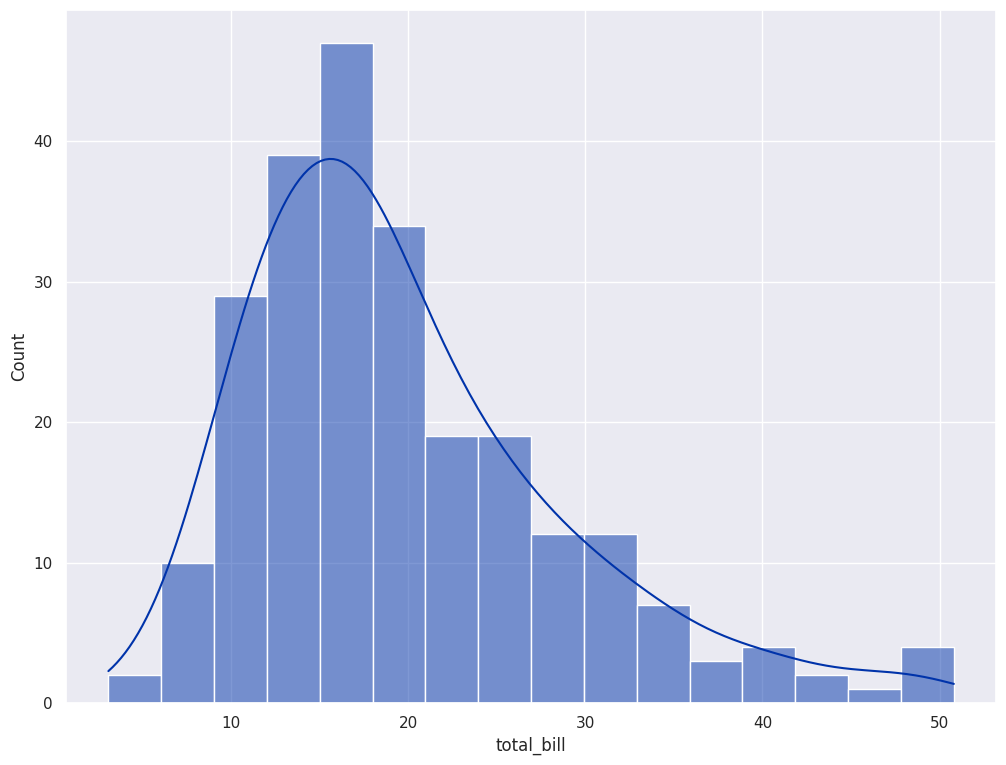

In [5]:
# seaborn のヒストグラム表示機能を用いた詳細設定

plt.figure( figsize=(12 , 9) )
sns.histplot( data = df , x = 'total_bill' , bins = 16 , color='#0033AA', kde=True )
plt.show()

* bins は x軸方向のデータ分割数
* kde は カーネル密度関数グラフの併記

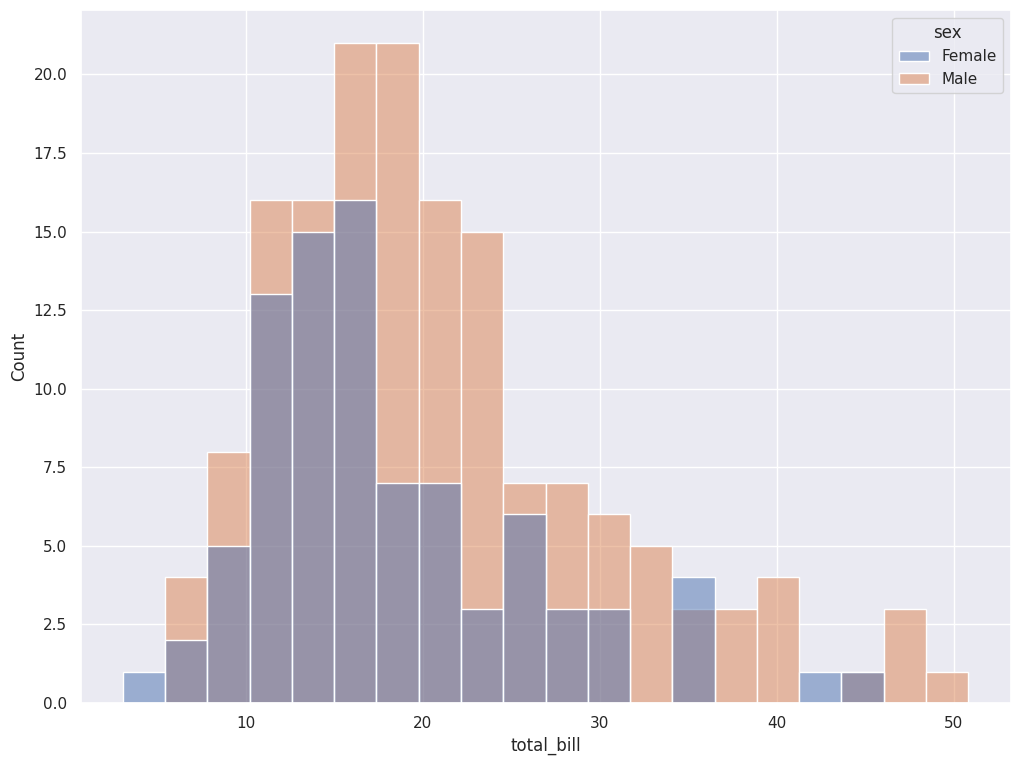

In [6]:
# seaborn の distplot  関数で２つのヒストグラムを表示する
plt.figure( figsize=(12 , 9) )
sns.histplot( data = df , x= 'total_bill' , bins=20, hue = 'sex' )
plt.show()

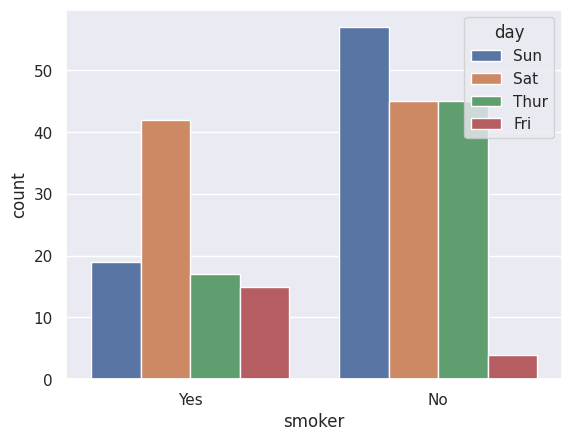

In [7]:
# seaborn の countplot を用いた「質的変数」の度数分布

sns.countplot( data = df , x = 'smoker' , hue = 'day' , order = ['Yes', 'No'] )
plt.show()

### 箱ひげ図　sns.boxplot

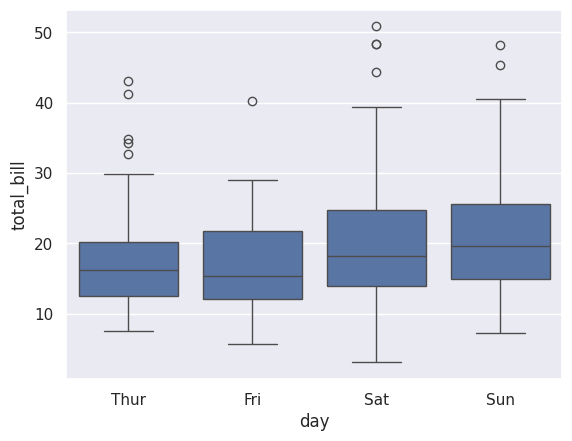

In [8]:
# seaborn の boxplot を用いた「箱ひげ図」の描画
sns.boxplot( data = df , x = 'day' , y = 'total_bill' , order = ['Thur','Fri','Sat','Sun'] )
plt.show()

### 散布図　sns.scatterplot

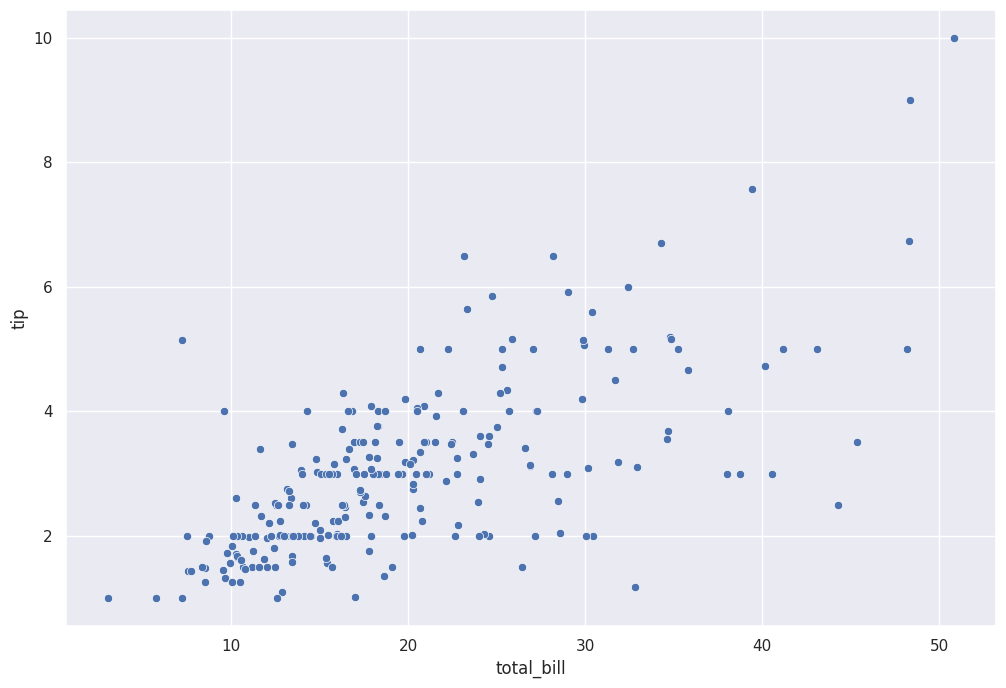

In [9]:
# seaborn の scatterplot を用いた「散布図」の描画
plt.figure( figsize=(12, 8) )
sns.scatterplot( data = df , x = 'total_bill' , y = 'tip' )
plt.show()

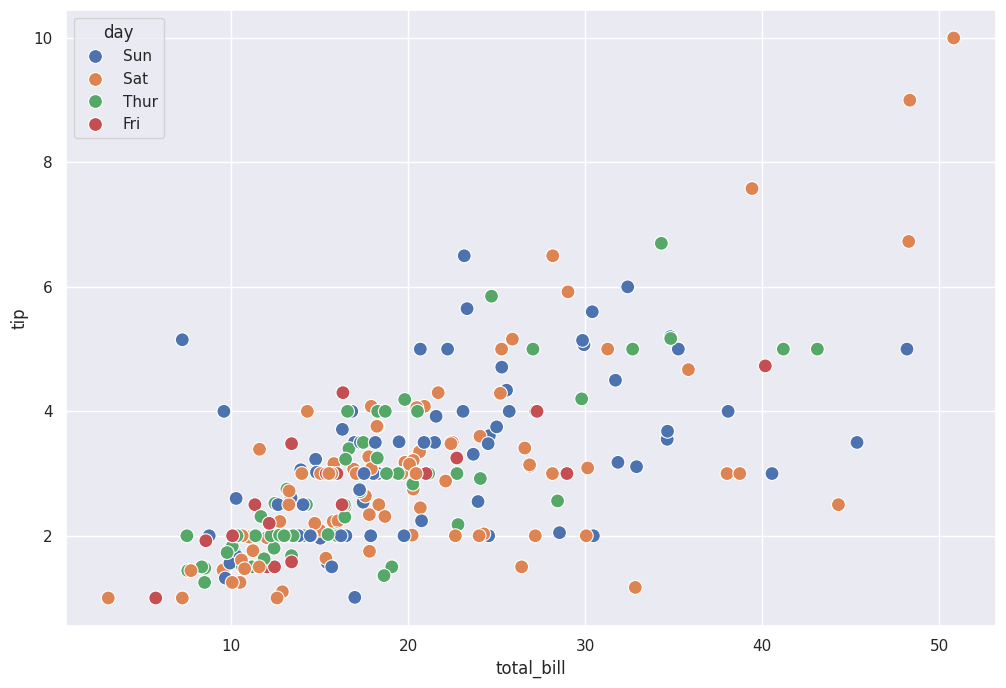

In [10]:
# カラムの「質的変数」（この例では曜日）の違いを色で区別して描画

plt.figure(figsize=(12, 8))
sns.scatterplot( data = df , x = 'total_bill' , y = 'tip' , hue = 'day' , s = 100 )
plt.show()

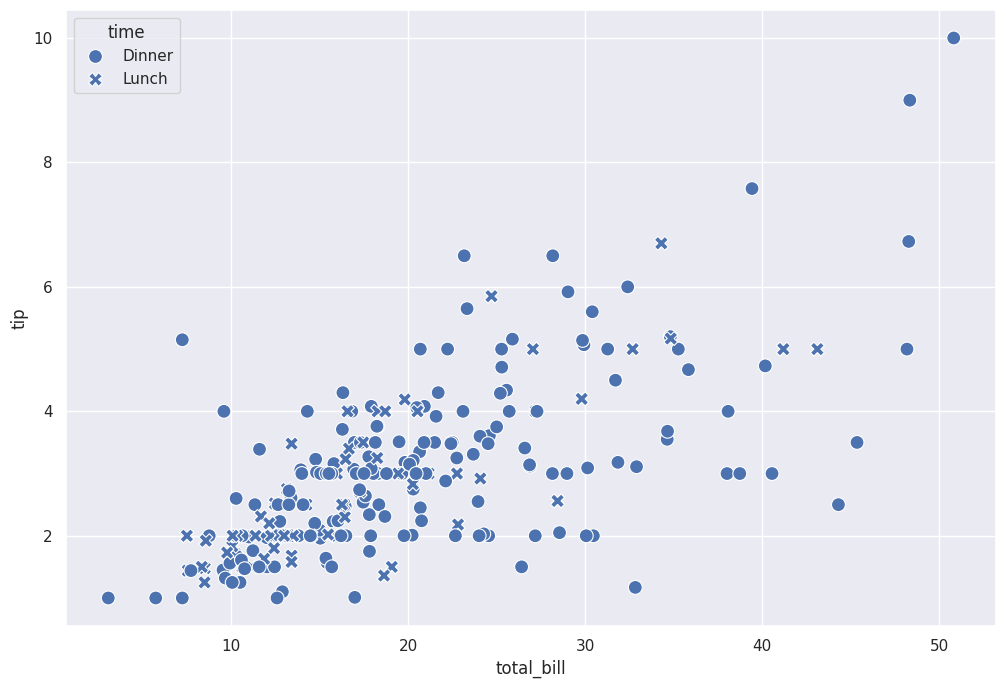

In [11]:
# カラムの「質的変数」（この例では ランチとディナー）の違いを形で区別して描画

plt.figure(figsize=(12, 8))
sns.scatterplot( data = df , x = 'total_bill' , y = 'tip' , style = 'time' , s = 100 )
plt.show()

### バブルチャート　sns.scatterplot

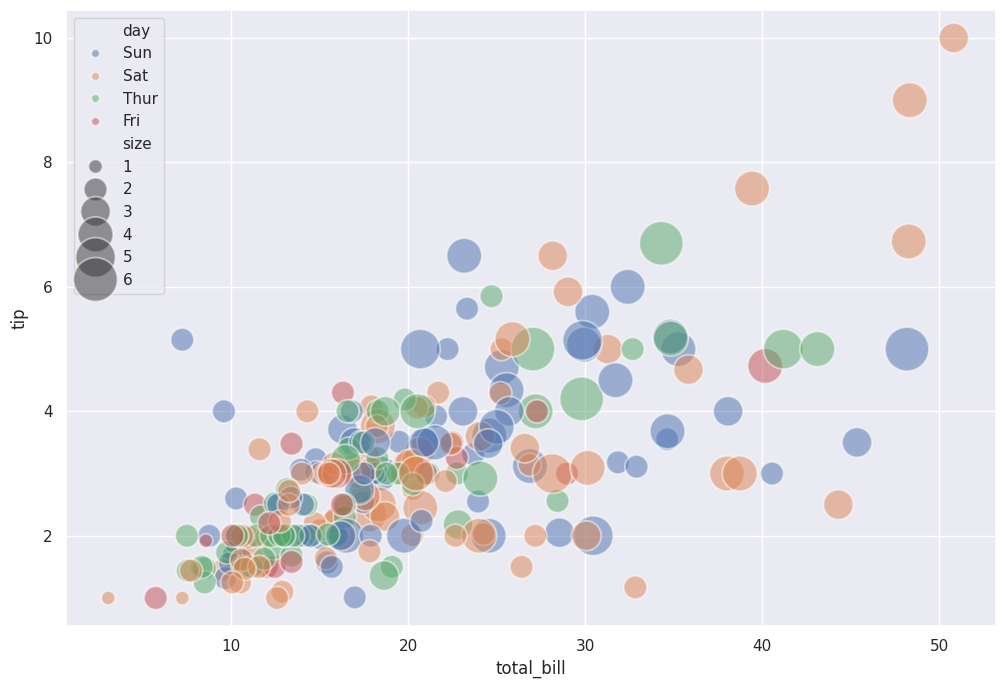

In [12]:
# カラムの「量的変数」（この事例では「テーブルサイズ」）をドットの大きさを変えて描画する

plt.figure(figsize=(12, 8))
sns.scatterplot( data = df , x = 'total_bill' , y = 'tip' , hue = 'day' , size = 'size' , sizes = (100,1000) , alpha = 0.5 )
plt.show()

### 散布図行列　sns.pairplot

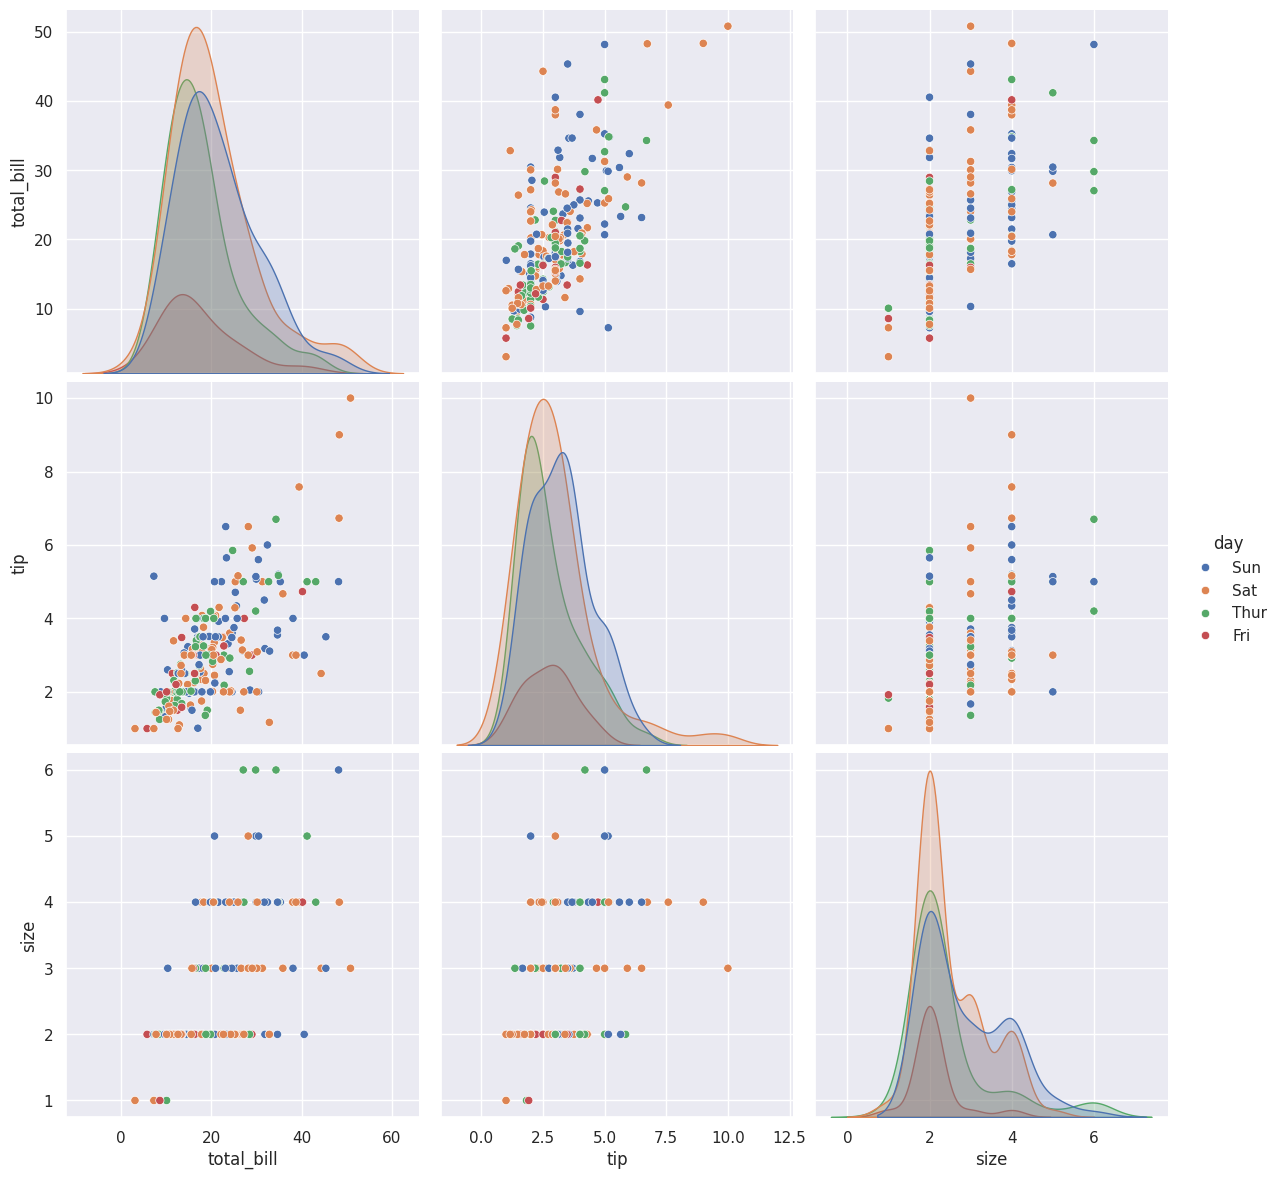

In [13]:
# seaborn の pairplot を用いた「散布図行列」の描画

sns.pairplot( data = df , hue = 'day' , height = 4 , aspect = 1 )
plt.show()


### ヒートマップ　sns.heatmap


In [14]:
# covid-19.csv の読み込み
df2 = pd.read_csv("https://raw.githubusercontent.com/koichi-inoue/DataScience/main/covid-19.csv" , index_col=0)

# 先頭５行の表示
df2[:5]

,2022/1/,2022/2/,2022/3/,2022/4/,2022/5/,2022/6/,2022/7/,2022/8/,2022/9/,2022/10/,2022/11/
ALL,1082695,2106113,1475036,1249639,940734,469555,3463299,6173065,2322437,1031165,2348433
Hokkaido,28862,73823,48780,65147,61402,21520,75862,193024,97175,89069,221141
Aomori,3879,10848,15003,11587,8848,6184,27589,50324,21700,10883,29654
Iwate,1266,6074,7315,9219,7031,3284,16575,36538,17469,12222,32442
Miyagi,5276,18787,17552,16234,12660,7070,40241,91633,33866,22918,75008


In [15]:
# ALL の行を削除
df2.drop( index='ALL', inplace = True)

# 先頭５行の表示
df2[:5]

,2022/1/,2022/2/,2022/3/,2022/4/,2022/5/,2022/6/,2022/7/,2022/8/,2022/9/,2022/10/,2022/11/
Hokkaido,28862,73823,48780,65147,61402,21520,75862,193024,97175,89069,221141
Aomori,3879,10848,15003,11587,8848,6184,27589,50324,21700,10883,29654
Iwate,1266,6074,7315,9219,7031,3284,16575,36538,17469,12222,32442
Miyagi,5276,18787,17552,16234,12660,7070,40241,91633,33866,22918,75008
Akita,1972,5243,6699,8281,5349,1617,13401,36194,19042,12854,28870


<Axes: >

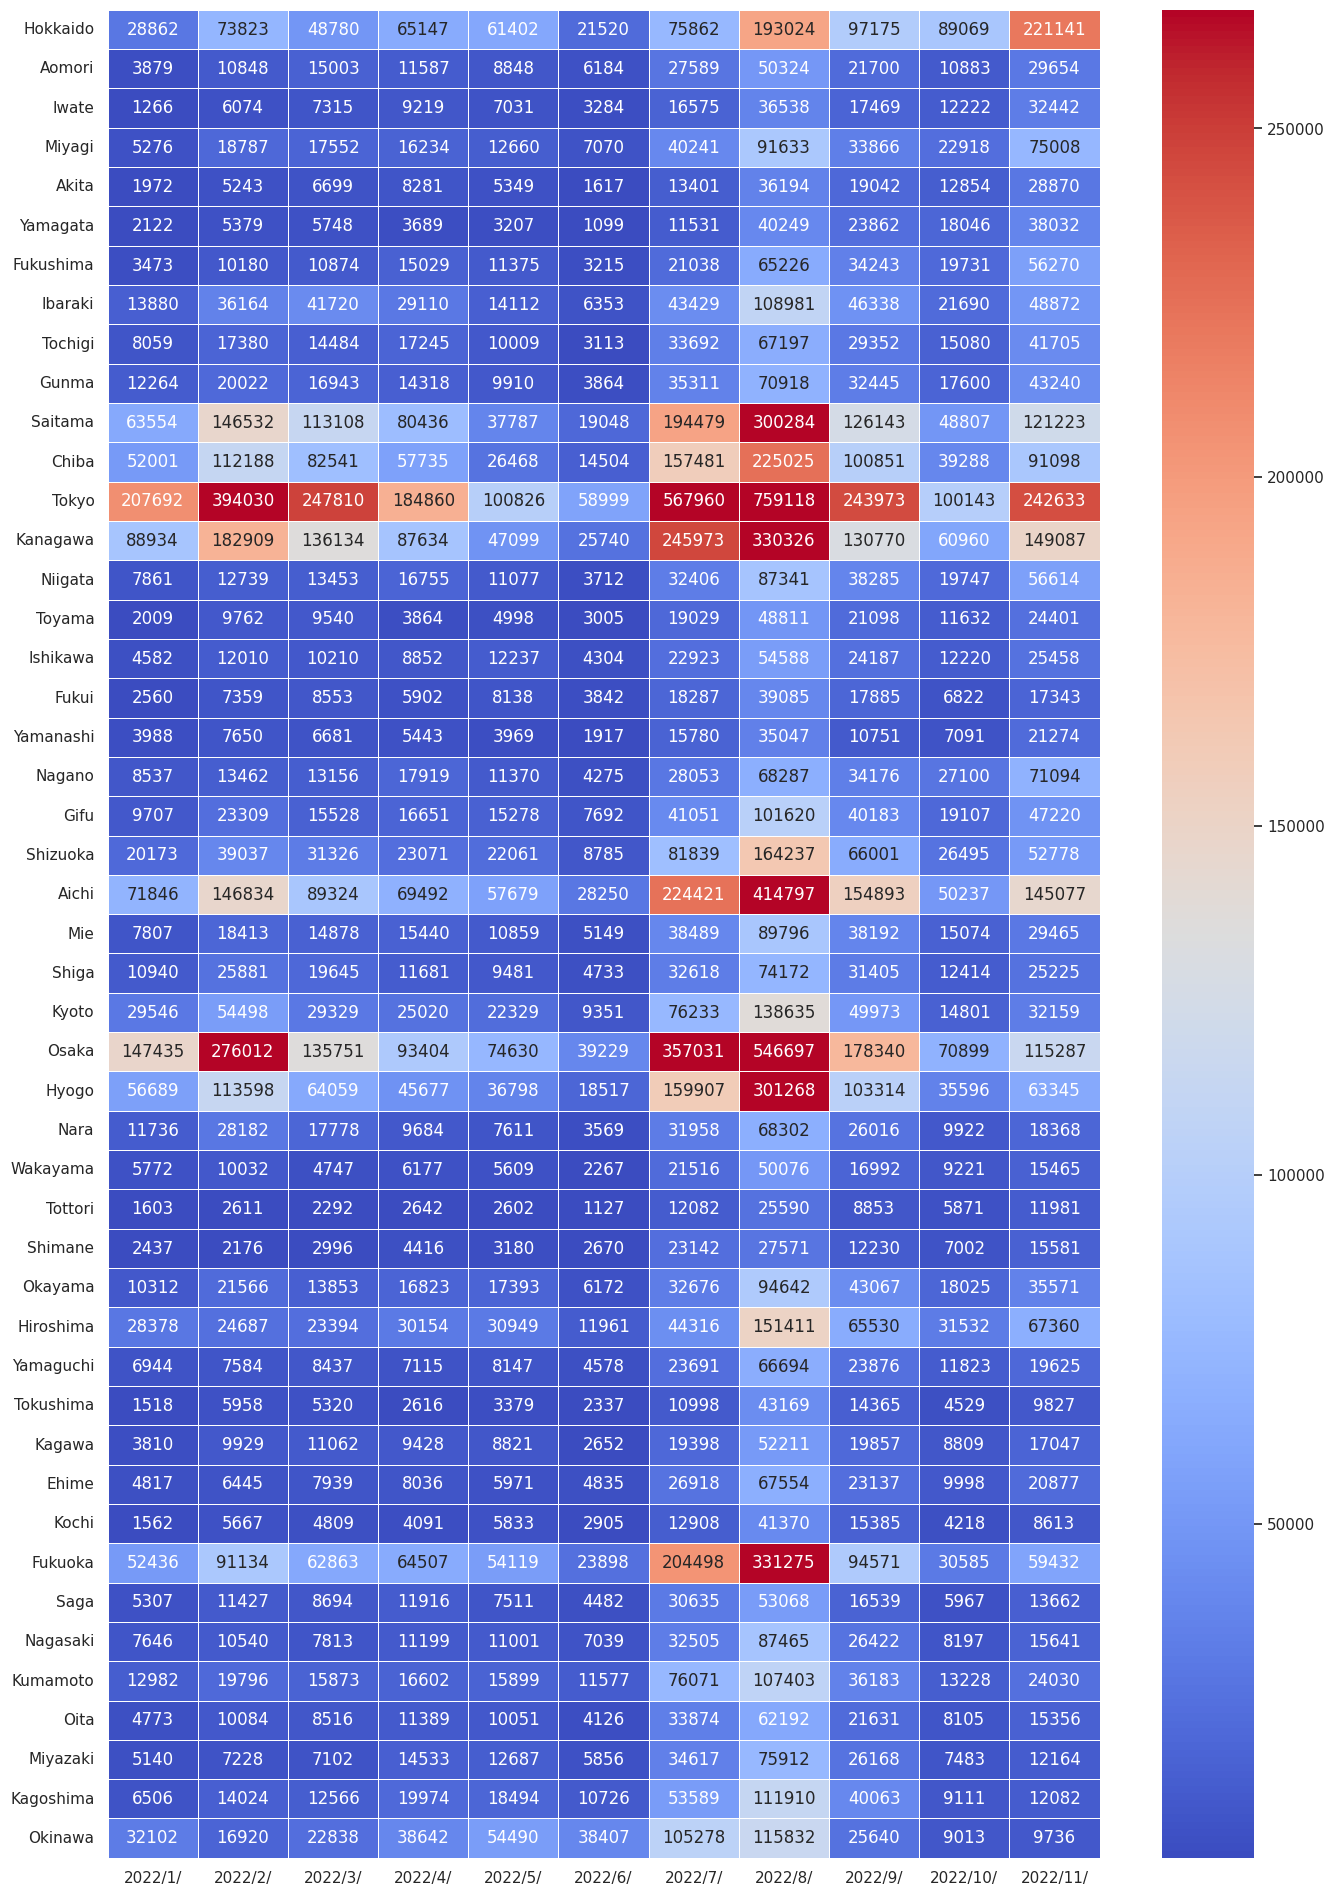

In [16]:
# ヒートマップの表示
plt.figure( figsize=(16, 24))
sns.heatmap( df2 , linewidths=.5 , cmap="coolwarm" , fmt="d" , annot=True , robust=True )

## データの書き出し事例

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

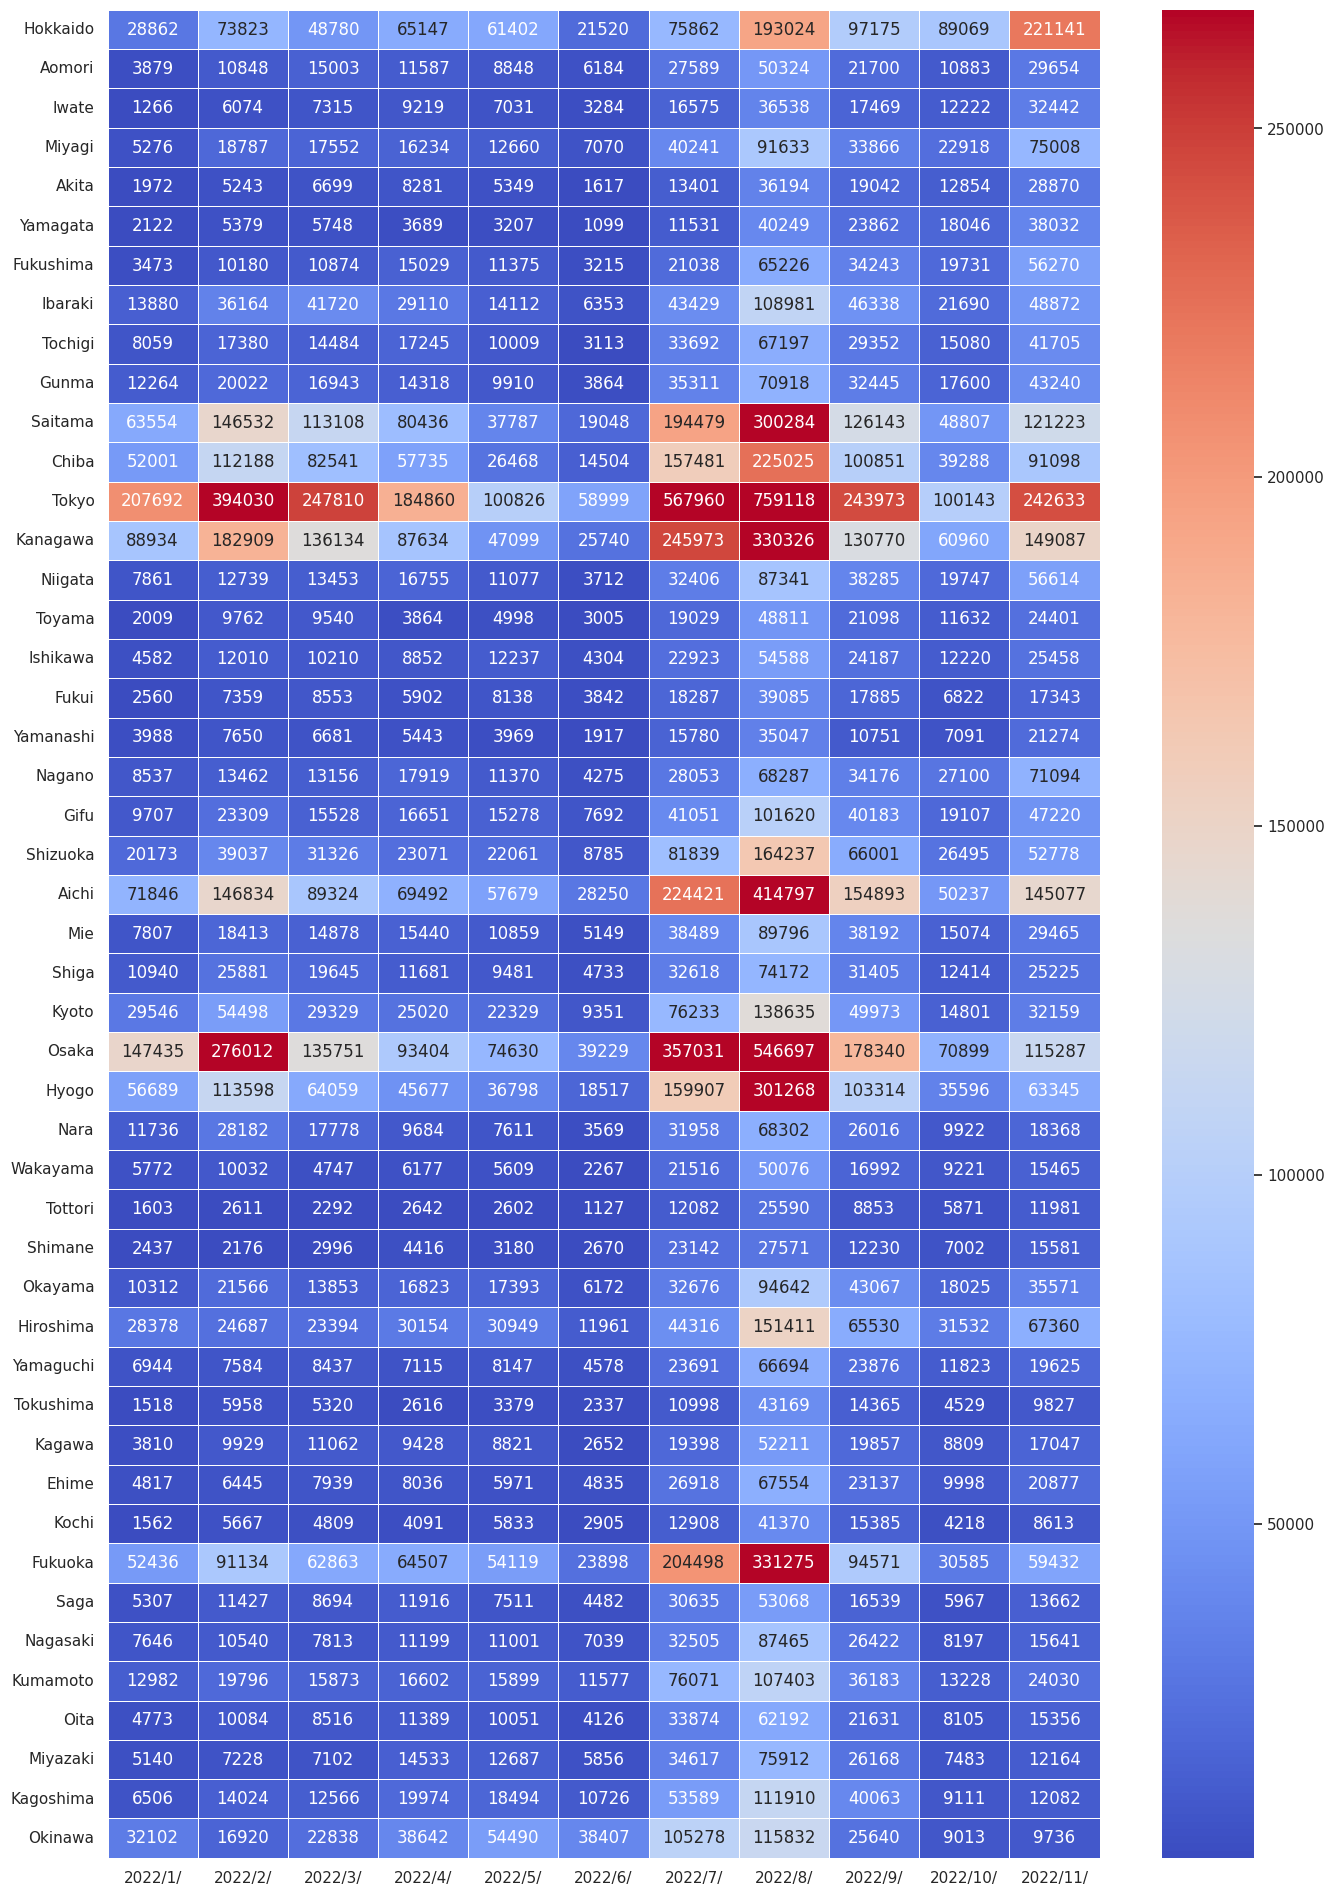

In [17]:
# GoogleColab のファイル操作機能の読み込み
from google.colab import files

# ヒートマップの表示
plt.figure( figsize=(16, 24))
sns.heatmap(df2 , linewidths=.5 , cmap="coolwarm" , fmt="d" , annot=True , robust=True )

#画像の保存（内部的に保存されます）
plt.savefig('heatmap.png')

# GoogleColab の機能を使ってファイルをダウンロード
files.download('heatmap.png')